# Chapter 7. Data Visualization Using Python

파이썬에서 데이터를 시각화하는 방법에 대해서 알아보자. 

- 시각화를 위해서는 시각화 관련 모듈을 로딩해야 한다. 
- 사용할 모듈은 Seaborn 이라는 모듈 (https://seaborn.pydata.org) 이다. 

Seaborn 에서 수행 가능한 다양한 종류의 시각화의 예는 이 링크를 참조하자 
https://seaborn.pydata.org/examples/index.html


# 1. 실험 데이터를 이용한 Boxplot 작성법 

seaborn 모듈을 sns 라는 약자로 불러온다. 


In [1]:
import seaborn as sns
import pandas as pd

#예제 (Github에 있음) 엑셀 파일을 pandas로 읽어보자. 

kd=pd.read_excel('knockdown.xlsx')
kd

/Users/suknamgoong/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Unnamed: 0,MI-Control,MI-RNAi,MI-Rescue,MII-Control,MII-RNAi,MII-Rescue
0,0,115.903573,38.415544,72.130314,83.363723,47.993328,72.287388
1,1,126.236345,65.777312,52.558250,90.655391,54.178471,64.361410
2,2,131.576317,38.465706,122.824657,87.380576,55.975686,55.227195
3,3,117.721156,37.074075,117.793223,79.322413,50.968077,62.595770
4,4,119.965972,63.443569,76.173226,102.184970,51.540825,56.121697
5,5,150.045320,40.850961,77.420474,77.859555,54.090038,122.730129
6,6,126.878243,35.028804,99.141456,75.913773,39.869128,128.268704
7,7,87.152298,35.907767,80.557172,65.535237,43.300153,66.228501
8,8,90.176818,34.086915,122.165746,55.749044,40.814665,127.066796
9,9,115.977250,27.842532,129.666567,55.855886,47.730282,51.503258


위의 데이터는 Control과 어떤 유전자를 RNAi 로 knockdown 시킨 것, 그리고 이것을 Rescue 한 3가지 처리의 샘플을  
두가지 발생 단계(MI, MII)에서 단백질의 발현을 형광현미경으로 측정한 결과이다. 

컬럼의 데이터는 다른 세포에서의 반복 측정이다. 
이 데이터를 이용하여 다음 논문의 Fig. 3B와 같은 플롯을 그려보자. 
 
https://jcs.biologists.org/content/joces/128/1/160.full.pdf

각 처리군의 반복 횟수는 동일하지 않고, 이를 DataFrame에 불러오면 공백은 NaN 이라고 표시된다.   

## 데이터 전처리 

이를 시각화하기 위해서는 일단 데이터를 정리할 필요가 있다. 
불필요한 행을 줄인다. 

In [2]:
kd = kd.drop(columns='Unnamed: 0')
kd

,MI-Control,MI-RNAi,MI-Rescue,MII-Control,MII-RNAi,MII-Rescue
0,115.903573,38.415544,72.130314,83.363723,47.993328,72.287388
1,126.236345,65.777312,52.558250,90.655391,54.178471,64.361410
2,131.576317,38.465706,122.824657,87.380576,55.975686,55.227195
3,117.721156,37.074075,117.793223,79.322413,50.968077,62.595770
4,119.965972,63.443569,76.173226,102.184970,51.540825,56.121697
5,150.045320,40.850961,77.420474,77.859555,54.090038,122.730129
6,126.878243,35.028804,99.141456,75.913773,39.869128,128.268704
7,87.152298,35.907767,80.557172,65.535237,43.300153,66.228501
8,90.176818,34.086915,122.165746,55.749044,40.814665,127.066796
9,115.977250,27.842532,129.666567,55.855886,47.730282,51.503258


포맷을 바꾼다.   
각 컬럼에 처리군 별 데이터를 담는 것이 아니라, 한 행으로 통일하고, 대신 'treatment' 로 처리의 종류를 구분하도록 한다.   
dropna() 로 NaN 을 제거한다.   

In [3]:
#포맷을 바꾼다. 

transformed = pd.melt(kd,value_name='intensity',var_name='treatment').dropna()
transformed

,treatment,intensity
0,MI-Control,115.903573
1,MI-Control,126.236345
2,MI-Control,131.576317
3,MI-Control,117.721156
4,MI-Control,119.965972
...,...,...
182,MII-Rescue,83.009689
183,MII-Rescue,57.735090
184,MII-Rescue,70.715919
185,MII-Rescue,87.750427


## Box plot 

Box plot 에는 5가지 요소를 표시한다. 

- Minimum : 최소값 
- Maximum : 최대값 
- Median : 중간값 
- First quartile : 가작 작은 값에서 25% 
- Third quartile : 가장 큰 값에서 75%

https://seaborn.pydata.org/generated/seaborn.boxplot.html
- data 에는 데이터를 저장하고 있는 데이터프레임을,  
- y 에는 데이터 값이 저장된 컬럼을,  
- x 에는 각각의 샘플을 구분하는 컬럼을 지정한다.  

<AxesSubplot:xlabel='treatment', ylabel='intensity'>

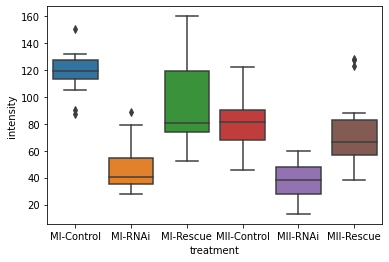

In [4]:
sns.boxplot(data=transformed,y='intensity',x='treatment')

<AxesSubplot:xlabel='treatment', ylabel='intensity'>

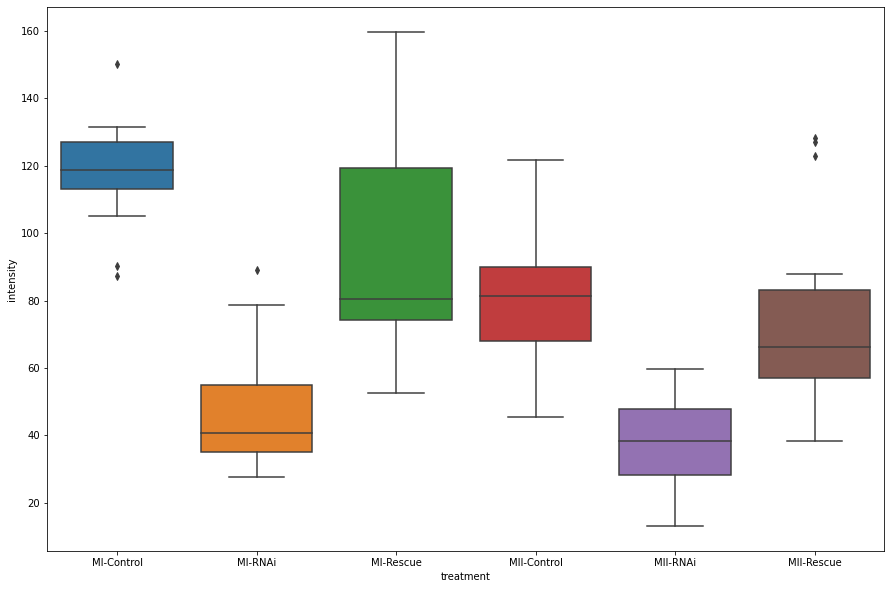

In [5]:
#그림의 크기를 키우자 
from matplotlib import pyplot as plt

#x와 y의 인치로 그림의 가로 세로 길이를 지정
plt.figure(figsize=(15,10))
sns.boxplot(data=transformed,y='intensity',x='treatment')

# stripplot 

실제 데이터의 분포를 추가해주면 데이터의 분포를 보다 확실히 확인할 수 있다. 

동시에 두 종류의 플롯을 그릴 때는 두 종류의 플롯을 연속하여 그리면 된다. 

https://seaborn.pydata.org/generated/seaborn.stripplot.html   



<AxesSubplot:xlabel='treatment', ylabel='intensity'>

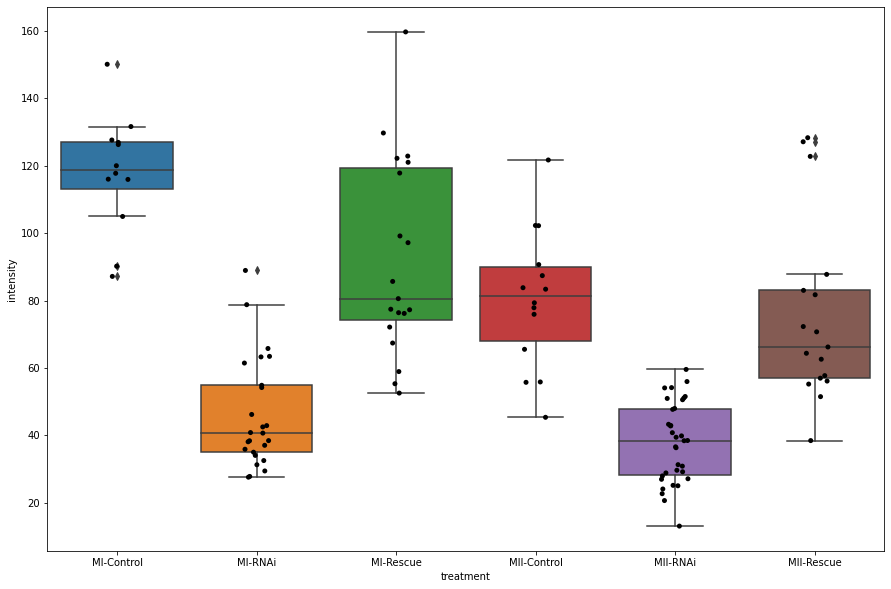

In [6]:
plt.figure(figsize=(15,10))
sns.boxplot(data=transformed,y='intensity',x='treatment')
sns.stripplot(data=transformed,y='intensity',x='treatment',color='black')

In [ ]:
Overlay 한 점의 투명도와 점 크기를 바꾸어 보자. 

size로 점의 크기를, alpha로 점의 투명도를 조절할 수 있다. 

<AxesSubplot:xlabel='treatment', ylabel='intensity'>

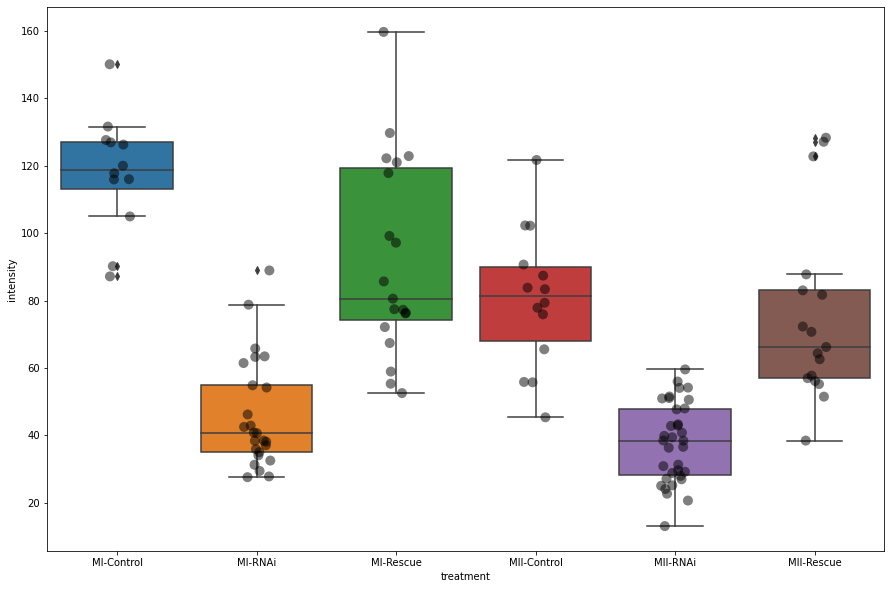

In [7]:
plt.figure(figsize=(15,10))
sns.boxplot(data=transformed,y='intensity',x='treatment')
sns.stripplot(data=transformed,y='intensity',x='treatment',color='black',size=10, alpha=.50)

어떤 경우에는 strippplot 만으로 표현하는 것이 더 나을수도 있다. 

<AxesSubplot:xlabel='treatment', ylabel='intensity'>

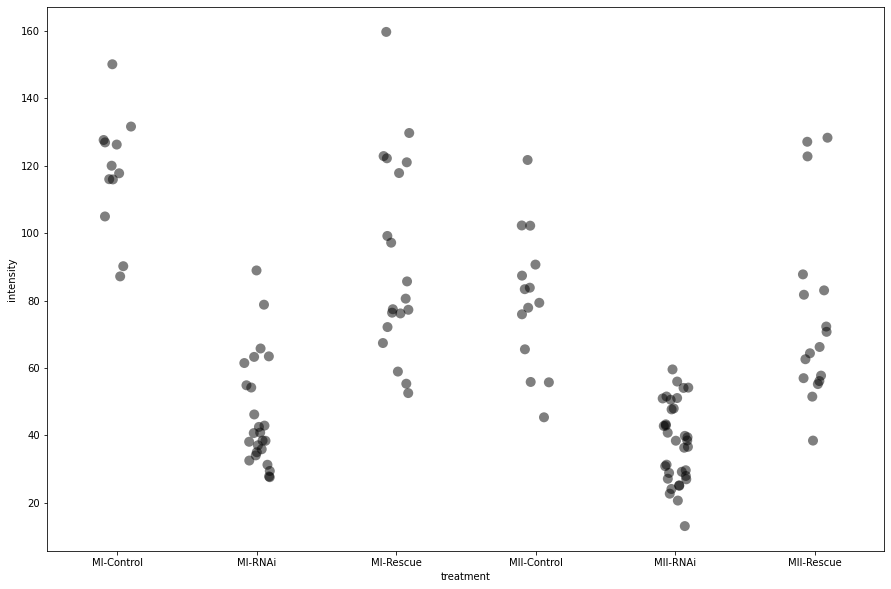

In [8]:
plt.figure(figsize=(15,10))
sns.stripplot(data=transformed,y='intensity',x='treatment',color='black',size=10, alpha=.50)

바이올린 플롯을 이용하면 분포를 직접 살펴볼 수 있다.
반복이 지금보다 더 많은 경우 유리하다. 

<AxesSubplot:xlabel='treatment', ylabel='intensity'>

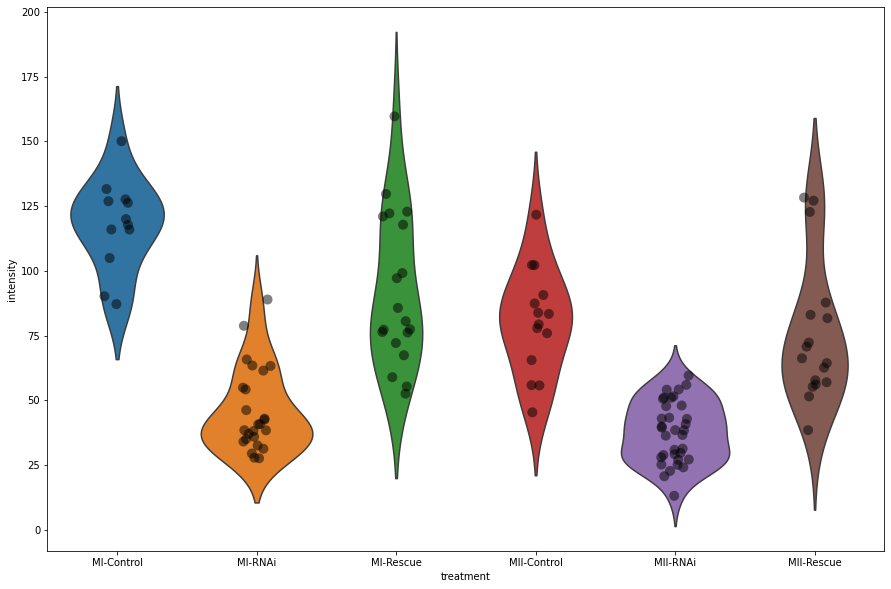

In [9]:
plt.figure(figsize=(15,10))
sns.violinplot(data=transformed,y='intensity',x='treatment',inner=None)
sns.stripplot(data=transformed,y='intensity',x='treatment',color='black',size=10, alpha=.50)

## 데이터 변형 및 색 지정 

지금까지는 각각의 샘플을 다른 컬러로 지정했지만, 그것보다는 처리군의 종류에 따라서 (Control, RNAi, Rescue) 각각 같은 색으로 칠해보자.  
이를 위해서는 데이터를 수정할 필요가 있다. 

'treatment' 는 Sample Stage-Treatment 형식으로 되어 있는데 (MI-Control)  
이것을 각각의 컬럼으로 나누어 보자.  

split 함수를 이용하여 '-' 기준으로 나눈다. 

In [28]:
transformed

,treatment,intensity
0,MI-Control,115.903573
1,MI-Control,126.236345
2,MI-Control,131.576317
3,MI-Control,117.721156
4,MI-Control,119.965972
...,...,...
182,MII-Rescue,83.009689
183,MII-Rescue,57.735090
184,MII-Rescue,70.715919
185,MII-Rescue,87.750427


In [29]:
transformed['treatment'].str.split('-')

0      [MI, Control]
1      [MI, Control]
2      [MI, Control]
3      [MI, Control]
4      [MI, Control]
           ...      
182    [MII, Rescue]
183    [MII, Rescue]
184    [MII, Rescue]
185    [MII, Rescue]
186    [MII, Rescue]
Name: treatment, Length: 121, dtype: object

'-'를 기준으로 리스트에 저장되는데, 앞의 항목은 str[0]으로, 뒤의 항목은 str[1]로 억세스가 가능하다.

앞 부분은 'stage'에 저장하고

In [10]:
transformed['stage']=transformed['treatment'].str.split('-').str[0]
transformed['stage']

0       MI
1       MI
2       MI
3       MI
4       MI
      ... 
182    MII
183    MII
184    MII
185    MII
186    MII
Name: stage, Length: 121, dtype: object

뒷 부분은 'Treat'에 저장

In [11]:
transformed['treat']=transformed['treatment'].str.split('-').str[1]
transformed['treat']

0      Control
1      Control
2      Control
3      Control
4      Control
        ...   
182     Rescue
183     Rescue
184     Rescue
185     Rescue
186     Rescue
Name: treat, Length: 121, dtype: object

In [14]:
#변형된 테이블을 살펴보자. 

transformed

,treatment,intensity,stage,treat
0,MI-Control,115.903573,MI,Control
1,MI-Control,126.236345,MI,Control
2,MI-Control,131.576317,MI,Control
3,MI-Control,117.721156,MI,Control
4,MI-Control,119.965972,MI,Control
...,...,...,...,...
182,MII-Rescue,83.009689,MII,Rescue
183,MII-Rescue,57.735090,MII,Rescue
184,MII-Rescue,70.715919,MII,Rescue
185,MII-Rescue,87.750427,MII,Rescue


'treat'의 종류에 따라서 다른 색을 칠하자.  
hue= 에 색을 다르게 칠할 기준이 되는 컬럼을 지정하자. 

<AxesSubplot:xlabel='treatment', ylabel='intensity'>

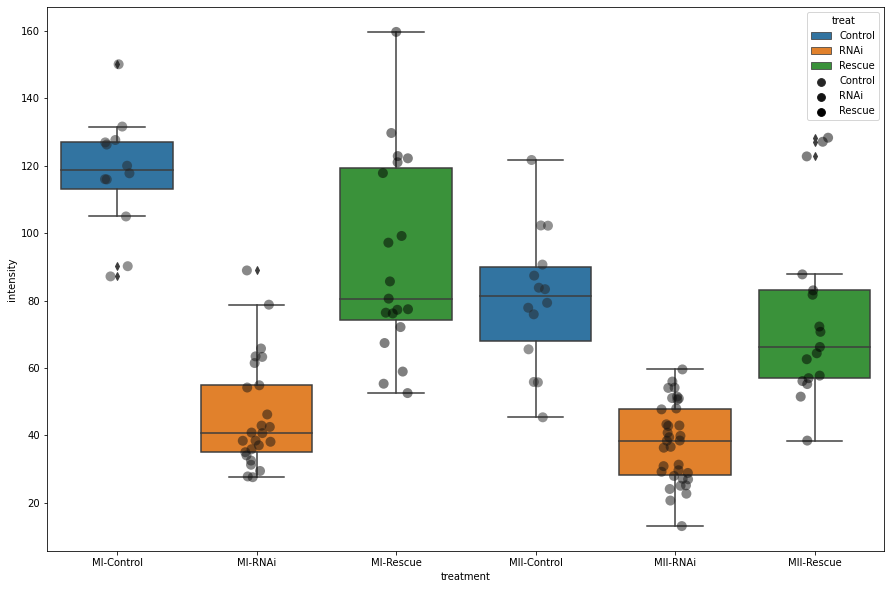

In [16]:
#'treat'의 종류에 따라서 다른 색을 칠하자
plt.figure(figsize=(15,10))
sns.boxplot(data=transformed,y='intensity',x='treatment',hue='treat',dodge=False)
sns.stripplot(data=transformed,y='intensity',x='treatment',hue='treat',jitter=True,dodge=False, alpha=0.5,color='black',size=10)

색을 바꿀 수 있다.   
색을 바꾸는 방법에 대해서는 여기 참조   
https://seaborn.pydata.org/tutorial/color_palettes.html   

'pallette' 에 'Greys' 를 선택하여 회색조로 바꾼다. 

<AxesSubplot:xlabel='treatment', ylabel='intensity'>

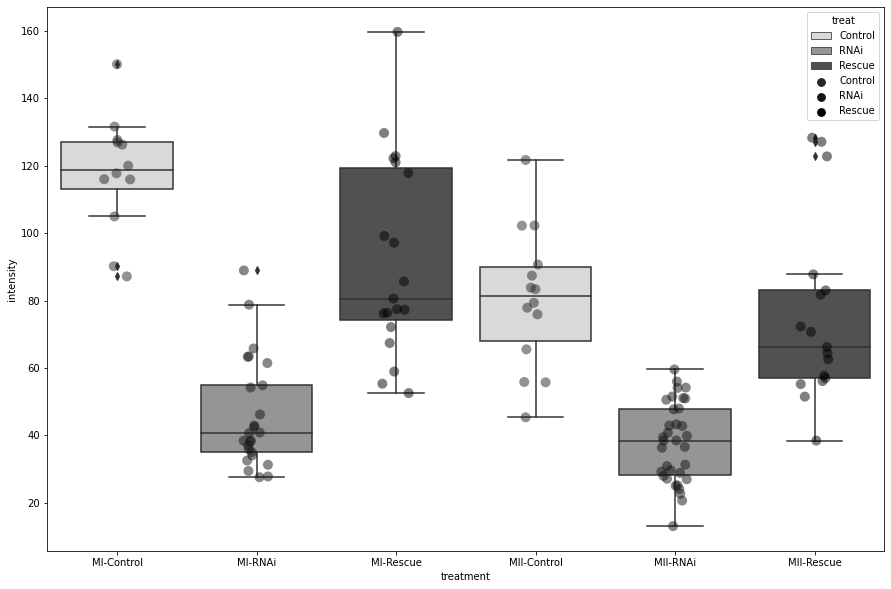

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(data=transformed,y='intensity',x='treatment',hue='treat',dodge=False,palette='Greys')
sns.stripplot(data=transformed,y='intensity',x='treatment',hue='treat',jitter=True,dodge=False, alpha=0.5,color='black',size=10)

<AxesSubplot:xlabel='treatment', ylabel='intensity'>

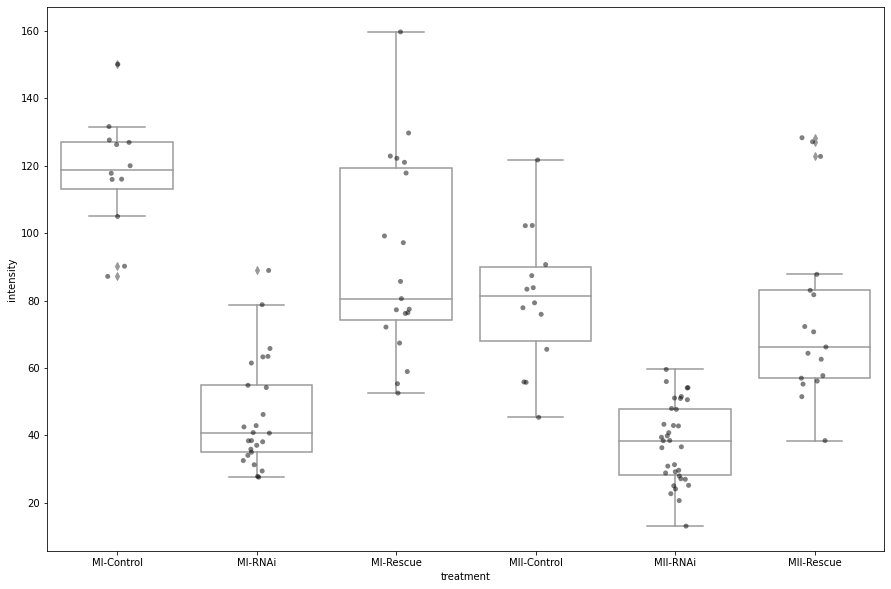

In [49]:
plt.figure(figsize=(15,10))
sns.boxplot(data=transformed,y='intensity',x='treatment',color='white',dodge=False)
sns.stripplot(data=transformed,y='intensity',x='treatment',jitter=True,dodge=False,alpha=0.5,color='black')

In [ ]:
#그림의 크기를 키우자 
from matplotlib import pyplot as plt
#x와 y의 인치로 지정
plt.figure(figsize=(15,10))
sns.set_style("white")
sns.boxplot(data=transformed,y='intensity',x='treatment',hue='treat',dodge=False, palette="Greys")
sns.stripplot(data=transformed,y='intensity',x='treatment',hue='treat',jitter=True,dodge=False, alpha=0.5,color='grey')


In [ ]:
#글자 크기를 키우고 Legends를 왼쪽으로 배치 

sns.set(font_scale=2)
plt.figure(figsize=(15,10))
sns.set_style("white")
g = sns.boxplot(data=transformed,y='intensity',x='treatment',hue='treat',dodge=False, palette="Greys")
sns.stripplot(data=transformed,y='intensity',x='treatment',hue='treat',jitter=True,dodge=False, alpha=0.7,color='grey')
g.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1)
#그림을 fig.pdf로 저장
plt.savefig('fig.png')

In [ ]:
transformed.to_excel('transformed.xlsx')

이렇게 pdf 형태로 저장된 표는 그대로 사용할 수도 있고,  
Illustrator 등의 외부 프로그램을 이용하여 서식을 재조정할 수도 있음. 

## 코로나-19 감염자 데이터를 이용한 시계열 (Time-Series) 데이터 분석  


https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases
에 있는 코로나-19 전세계 감염자 데이터를 이용한 비주얼라이제이션을 하자. 

In [ ]:
#다른 종류의 그래프를 그려보자. 
#이를 위해 다른 종류의 데이터를 불러온다.
#국가별 코로나-19 감염자의 데이터이다. 


In [ ]:
!ls *.csv

In [ ]:
#데이터를 불러오자. 
import pandas as pd
covid19 = pd.read_csv('time_series_covid19_confirmed_global.csv')
covid19

In [ ]:
covid19['Country/Region'].unique()

In [ ]:
#여기서 한국 데이터만 추린다. 

korea = covid19[covid19['Country/Region'].isin(['Korea, South'])]
korea

In [ ]:
#시각화를 위해서 데이터의 형식을 바꾼다. 
#일단 열로 길게 된 데이터의 방향을 바꾼다. 

koreadata = pd.melt(korea,value_name='cases',var_name='date')
koreadata

In [ ]:
#불필요한 처음 4행(0,1,2,3)을 지운다.

koreadata = koreadata[4:]
koreadata

In [ ]:
koreadata.dtypes

In [ ]:
#데이터의 타입을 검사한다. 
#역시 데이터의 타입이 그냥 글자로 되어 있다...
koreadata.dtypes

In [ ]:
#건수 ('case')는 정수(int64)로 변환하고 
#날짜는 날짜 형식으로 변환한다. 

koreadata['cases']=koreadata['cases'].astype('int64')
koreadata['date']=pd.to_datetime(koreadata['date'])
koreadata

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
plt.figure(figsize=(15,10))

sns.lineplot(data=koreadata,x='date',y='cases')

일별 증가량을 계산해 보자.  
일별 증가량은 '오늘의 확진자 건수' - '어제의 확진자 건수'

In [ ]:
#diff는 이전과의 증가량을 계산하는 함수이다.
difference = koreadata.diff()

#첫번째 날은 데이터가 없으므로 0 으로 채워 준다. 


In [ ]:
difference.columns=['interval','increase']
difference

In [ ]:
#한국 데이터에 증가건수를 덧붙인다. 
#기준은 index 이다. 

newkoreadata = pd.merge(koreadata,difference,left_index=True,right_index=True)

In [ ]:
newkoreadata

In [ ]:
# 확진자 증가 추세를 플로팅해보자. 
from matplotlib import pyplot as plt
#x와 y의 인치로 지정
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style("white")
sns.lineplot(data=newkoreadata,x='date',y='increase')

In [ ]:
#증가율과 전체 누적 증가율을 같이 표현하려면?
#이 데이터를 long form으로 바꾸어야 한다. 

newkoreadata


In [ ]:
newkorea = newkoreadata.melt(id_vars=['date'],value_vars=['cases','increase'])

In [ ]:
newkorea

In [ ]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style("white")
sns.lineplot(data=newkorea,x='date',y='value',hue='variable')

In [ ]:
#일본의 데이터를 한국과 비교해보자. 
#동일한 방식으로 일본 데이터를 추려내자. 

japan = covid19[covid19['Country/Region'].str.contains('japan',case=False)]
japandata = pd.melt(japan,value_name='cases',var_name='date')
japandata = japandata[4:]
japandata['cases']=japandata['cases'].astype('int64')
japandata['date']=pd.to_datetime(japandata['date'])
difference = japandata.diff()
difference.columns=['interval','increase']
newjapandata = pd.merge(japandata,difference,left_index=True,right_index=True)
newjapan = newjapandata.melt(id_vars=['date'],value_vars=['cases','increase'])

In [ ]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style("white")
sns.lineplot(data=newjapan,x='date',y='value',hue='variable')

In [ ]:
#한국과 일본의 발생 추이를 같은 컬럼에서 비교하자. 
newkorea

In [ ]:
ko = newkorea[newkorea['variable']=='cases']

In [ ]:
#여기서 발생수 (cases)만을 취하고, 이를 구분할 수 있도록 국가 코드를 붙이자. 
ko = newkorea[newkorea['variable']=='cases']

In [ ]:
ko['country']='korea'
ko

In [ ]:
jp = newjapan[newjapan['variable']=='cases']
jp['country']='japan'
jp

In [ ]:
#한일 데이터를 합치자 
kojp = pd.concat([ko,jp])
kojp

In [ ]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style("white")
sns.lineplot(data=kojp,x='date',y='value',hue='country')

## 연습문제

이 데이터셋에서 미국, 이탈리아, 독일, 프랑스의 전체 발생 추이를 추출하여 하나의 그래프로 그려 보자. 

## CCLE RNA-Seq 데이터 시각화 

지난주에 추출하여 분석하였던 CCLE 데이터셋을 이용하여 시각화를 해보도록 하자. 
https://www.ebi.ac.uk/gxa/home  

여기서 다음 예제 데이터를 다운로드받아보자.   
https://www.ebi.ac.uk/gxa/experiments/E-MTAB-8021/Downloads   


여기는 Mechanical Stimulation 을 가한 Arabidopsis에서 발현되는 유전자들을 RNA-Seq으로 분석하였음.  
https://www.ebi.ac.uk/gxa/experiments-content/E-MTAB-8021/resources/DifferentialSecondaryDataFiles.RnaSeq/analytics

In [ ]:
#데이터를 다운로드하자. 
#RNA-Seq 데이터 대신 일단 분석이 끝난 데이터를 다운로드한다. 

!curl -O https://www.ebi.ac.uk/gxa/experiments-content/E-MTAB-8021/resources/DifferentialSecondaryDataFiles.RnaSeq/analytics

In [ ]:
!head analytics

In [ ]:
import pandas as pd 

analysis = pd.read_csv('analytics',sep='\t')
analysis

In [ ]:
#mechanical stimulation 을 준다음 
analysis = analysis.sort_values(by="'mechanical stimulation' at '10 minute' vs 'none'.log2foldchange",ascending=False)

In [ ]:
analysis

In [ ]:
#Fold change가 가장 높은 200개의 유전자의 데이터를 추출 

Top200 = analysis[0:200]

In [ ]:
#데이터를 살펴본다. 
#데이터는 콘트롤과 자극을 준 후 10,25,40,60,180분후의 샘플의 RNA 발현을 비교한 후, 
# 각 유전자의 fold change (log2)와 p-value이다.


Top200

In [ ]:
Top100.columns

In [ ]:
#
#Fold change 데이터만을 추린다. 
#

T200 = Top200[["Gene ID",
       "'mechanical stimulation' at '10 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '25 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '40 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '60 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '180 minute' vs 'none'.log2foldchange"]]

T200.columns=['Gene','10min','25min','40min','60min','180min']

In [ ]:
T200

In [ ]:
T100.dtypes

In [ ]:
T1 = T200.set_index('Gene')
T1

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
#x와 y의 인치로 지정
plt.figure(figsize=(15,10))
sns.set_style("white")
sns.heatmap(T1)

In [ ]:
#데이터를 wide form에서 long form으로 바꾼다. 
#

T100

In [ ]:
#데이터를 long form으로 바꾸고, 시간을 숫자로 바꾼다. 

data = pd.melt(T200,id_vars=['Gene'])
data['variable']=data['variable'].str.replace('min','').astype('int')

In [ ]:
data

In [ ]:
data

In [ ]:
#선별된 100개 유전자의 평균과 추세를 표시한다. 

sns.set(font_scale=1.5)
sns.set_style("white")
plt.figure(figsize=(15,10))
sns.lineplot(data=data,x='variable',y='value')

In [ ]:
#이번에는 25분 지나면 감소하는 유전자이 어떻게 변하는지를 살펴본다. 

analysis2 = analysis.sort_values(by="'mechanical stimulation' at '25 minute' vs 'none'.log2foldchange",ascending=True)[0:100]
Top200 = analysis2[0:200]
T200 = Top200[["Gene ID",
       "'mechanical stimulation' at '10 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '25 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '40 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '60 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '180 minute' vs 'none'.log2foldchange"]]
T200.columns=['Gene','10min','25min','40min','60min','180min']
data2 = pd.melt(T200,id_vars=['Gene'])
data2['variable']=data2['variable'].str.replace('min','').astype('int')
T2 = T200.set_index('Gene')

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style("white")
sns.heatmap(T2)

In [ ]:
sns.set(font_scale=1.5)
sns.set_style("white")
plt.figure(figsize=(15,10))

g=sns.lineplot(data=data2,x='variable',y='value',hue='Gene')
g.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

In [ ]:
### 유전자의 정보를 추가해 본다. 
# 5장에서 사용했던 DNA, Protein 시퀀스로부터 정보를 추출하여 데이터테이블로 넣은 코드를 다시 재활용하자. 

In [ ]:
import pandas as pd
from pyfaidx import Fasta

def mid_extract (original, search1, search2):
    if (search1 in original) & (search2 in original):
        return(original.split(search1)[1].split(search2)[0])
    else:
        return('')

#5강에서 했던 단백질 서열에서부터 정보 추출 
    
AraProtein= Fasta('GCA_000001735.2_TAIR10.1_protein.faa')
proteinkey = []
proteindescription = []
proteinsequence = []

for protein in AraProtein.keys():
    proteinkey.append(protein)
    proteindescription.append(AraProtein[protein].long_name.split(protein+' ')[1].split(' [')[0])
    proteinsequence.append(str(AraProtein[protein]))


proteins = pd.DataFrame(data={'key':proteinkey,'description':proteindescription,'sequence':proteinsequence})
AraSequence= Fasta('GCA_000001735.2_TAIR10.1_cds_from_genomic.fna')


#5강에서 했던 DNA CDS 시퀀스 설명으로부터 정보 추출

 
DNAsequence = []
DNAproteinid = []
DNAlocusid = []

for Sequence in AraSequence.keys():
    name = AraSequence[Sequence].long_name
    DNAsequence.append(str(AraSequence[Sequence]))
    DNAproteinid.append(mid_extract(name,'[protein_id=',']'))
    DNAlocusid.append(mid_extract(name,'[locus_tag=',']'))

DNASeq = pd.DataFrame(data={'protein':DNAproteinid,'sequence':DNAsequence, 'locus':DNAlocusid})

#이 내용을 DNAprotein 이라는 데이터프레임으로 저장 
DNAprotein = pd.merge(DNASeq,proteins, left_on='protein',right_on='key', how='left')

In [ ]:
DNAprotein[['locus','description']]

In [ ]:
analysis2 = analysis.sort_values(by="'mechanical stimulation' at '25 minute' vs 'none'.log2foldchange",ascending=False)[0:100]

anal = analysis2[["Gene ID",
       "'mechanical stimulation' at '10 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '25 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '40 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '60 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '180 minute' vs 'none'.log2foldchange"]]
anal.columns=['Gene','10min','25min','40min','60min','180min']

In [ ]:
anal

In [ ]:
DP = DNAprotein[['locus','description']]

In [ ]:
DPP=pd.merge(anal,DP,left_on='Gene',right_on='locus',how='inner').drop_duplicates()
DPP

In [ ]:
DPPData=DPP[['description','10min','25min','40min','60min','180min']].set_index('description')

In [ ]:
DPPData

In [ ]:
plt.figure(figsize=(15,100))
sns.set_style("white")
sns.heatmap(DPPData)

In [ ]:
#
#비슷한 발현 변화 패턴을 보인 유전자 및 샘플별로 클러스터링 분석을 할 수 이싿. 
#

g = sns.clustermap(DPPData)

In [ ]:
DPPData.to_excel('Excel_expression.xlsx')

## 프로테옴의 길이 비교 

단백질 데이터를 로딩하였으니 떡본 김에 제사지낸다고 (...) 전체 단백질 길이의 히스토그램을 그려 보자. 

In [ ]:
DNAprotein

In [ ]:
#이전에 사용한 단백질 분자량을 구하는 함수를 단백질 서열에 적용하여 분자량을 구하자. 

def MolWeight(proteinsequence):
# 분자량을 구하는 함수 
# proteinsequence 에 아미노산 서열을 받고 
# MW 에는 각각의 아미노산과 분자량의 딕셔너리가 있다. 
    MW = {'G':57.05,
          'A':71.09,
          'S':87.08,
          'T':101.11,
          'C':103.15,
          'V':99.14,
          'L':113.16,
          'I':113.16,
          'M':131.19,
          'P':97.12,
          'F':147.18,
          'Y':163.18,
          'W':186.21,
          'D':115.09,
          'E':129.12,
          'N':114.11,
          'Q':128.14,
          'H':137.14,
          'K':128.17,
          'R':156.19,
          'X':0,
          'J':0}
    MolecularWeight=0
    for aa in proteinsequence:
        MolecularWeight=MolecularWeight+MW[aa]
    return(MolecularWeight)

DNAprotein['MW']=DNAprotein['sequence_y'].apply(MolWeight)

In [ ]:
DNAprotein

In [ ]:
%matplotlib inline
import seaborn as sns

sns.distplot(DNAprotein['MW'])

다른 식물간의 단백질 분자량을 비교하면 어떨까? 

쌀의 데이터를 읽어보자. 

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/plant/Oryza_sativa/latest_assembly_versions/GCA_000004655.2_ASM465v1/
    

In [ ]:
!curl -O "https://ftp.ncbi.nlm.nih.gov/genomes/genbank/plant/Oryza_sativa/latest_assembly_versions/GCA_000004655.2_ASM465v1/GCA_000004655.2_ASM465v1_protein.faa.gz"
!curl -O "https://ftp.ncbi.nlm.nih.gov/genomes/genbank/plant/Oryza_sativa/latest_assembly_versions/GCA_000004655.2_ASM465v1/GCA_000004655.2_ASM465v1_cds_from_genomic.fna.gz"

In [ ]:
!ls *.gz

In [ ]:
!gunzip GCA_000004655.2_ASM465v1_cds_from_genomic.fna.gz
!gunzip GCA_000004655.2_ASM465v1_protein.faa.gz

In [ ]:
#이전의 코드를 다시 이용
#단백질과 DNA의 파일 이름만 바꾸었다. 

import pandas as pd
from pyfaidx import Fasta

def mid_extract (original, search1, search2):
    if (search1 in original) & (search2 in original):
        return(original.split(search1)[1].split(search2)[0])
    else:
        return('')

#5강에서 했던 단백질 서열에서부터 정보 추출 
    
AraProtein= Fasta('GCA_000004655.2_ASM465v1_protein.faa')
proteinkey = []
proteindescription = []
proteinsequence = []

for protein in AraProtein.keys():
    proteinkey.append(protein)
    proteindescription.append(AraProtein[protein].long_name.split(protein+' ')[1].split(' [')[0])
    proteinsequence.append(str(AraProtein[protein]))


proteins = pd.DataFrame(data={'key':proteinkey,'description':proteindescription,'sequence':proteinsequence})

AraSequence= Fasta('GCA_000004655.2_ASM465v1_cds_from_genomic.fna')

#5강에서 했던 DNA CDS 시퀀스 설명으로부터 정보 추출

DNAsequence = []
DNAproteinid = []
DNAlocusid = []

for Sequence in AraSequence.keys():
    name = AraSequence[Sequence].long_name
    DNAsequence.append(str(AraSequence[Sequence]))
    DNAproteinid.append(mid_extract(name,'[protein_id=',']'))
    DNAlocusid.append(mid_extract(name,'[locus_tag=',']'))
    
DNASeq = pd.DataFrame(data={'protein':DNAproteinid,'sequence':DNAsequence, 'locus':DNAlocusid})

#이 내용을 DNAprotein 이라는 데이터프레임으로 저장 
RiceDNAprotein = pd.merge(DNASeq,proteins, left_on='protein',right_on='key', how='left')
RiceDNAprotein['MW']=RiceDNAprotein['sequence_y'].apply(MolWeight)

In [ ]:
RiceDNAprotein['MW']

In [ ]:
from matplotlib import pyplot as plt
#x와 y의 인치로 지정
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style("white")

g=sns.distplot(DNAprotein['MW'],hist=False,label='Arabidopsis')
g=sns.distplot(RiceDNAprotein['MW'],hist=False,label='Rice')
#X축의 범위를 지정 
g.set(xlim=(0,300000))

In [ ]:
1. 하나의 생물에서 서로 다른 계열의 단백질 (예 : Protein Kinase와 Protein Phosphatase 등등) 의 분자량 분포는 어떻게 다를까? 
2. 다른 식물 혹은 동물에서의 단백질 분자량을 추정해 보자. 